# Portofolio Project: Life Expectancy and GDP Example Project  

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.  
During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.  
After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.  

__Project Objectives:__
- Complete a project to add to your portfolio
- Use seaborn and Matplotlib to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

__Prerequisites:__
- Data Acquisition
- Data Visualization
- Hypothesis Testing
- Summarizing Quantitative Data
- Data Wrangling and Tidying
- Data Manipulation with Pandas

__Data file:__
- all_data.csv
This file contains data on GDP and life expectancy within different countries.

__Debugging Tips:__
Feeling stuck? Try the following:
- Google your question: oftentimes, someone has had the same question as you! Check out websites like StackOverflow (https://stackoverflow.com/) and Dev.to (https://dev.to/) to see how other folks have found solutions.
- Read the documentation: make sure to carefully read through the documentation for any languages and libraries that you are using. Oftentimes they’ll have examples of what you’re looking for!
- Rubber ducking: try to explain a problem to a friend or co-worker. Oftentimes you’ll figure out the solution as you’re trying to explain it. And if not, getting another pair of eyes on your code can be helpful.

__Check out these helpful resources:__
- Matplotlib user guide (https://matplotlib.org/stable/users/index.html)
- seaborn visualisation examples (https://seaborn.pydata.org/examples/index.html)
- numPy user guide (https://numpy.org/doc/stable/user/index.html)
- pandas user guide (https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- SciPy user guide (https://docs.scipy.org/doc/scipy/tutorial/index.html)  

__Example Code:__  
What to see an example of how someone else has completed this project?   
Click this link to download a zip file containing one example solution to this project.   
Remember: your project doesn’t have to look anything like this! It should be unique to your vision.  

## 1/ Loading libraries and data

In [3]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
from scipy.stats import sem

In [4]:
# Load data
df = pd.read_csv('all_data.csv')
print("df dimensions: ", df.shape) # (96, 4)
print(df.head())
# Summary statistics to find out what type of variables the dataset contains
print(df.info()) # no missing data
print(df.columns)

df dimensions:  (96, 4)
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Index(['Country', 'Year', 'Life expectancy at

In [5]:
# Range of numerical variables
print(df.describe())
# List of countries
print(df.Country.unique()) # ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
print(len(df.Country.unique()), " countries") # 6 countries
# List of years
print(df.Year.unique()) # [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
6  countries
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## 2/ Scoping the project

__Aim:__  
Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin.   
You should start with stating the goals for your project, then gathering the data, and considering the analytical steps required.   
A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope.  

__Prerequesite step:__  
In order to scope the project, I had to not only load the data and look at it raw, but also print some descriptive statistics using the .describe() method to find out what type of variables the dataset contains and if missing values are present using the .info() method.  
I also printed the column names using the .columns function as well as listed the various countries using the .unique() method for reporting purposes.  

__The Data:__  
The file 'all_data.csv contains 96 rows and 4 colums without missing values.  
The variables are:  
- 'Country': categorical (nominal) variable listing various countries ('Chile','China','Germany','Mexico','United States of America','Zimbabwe').
- 'Year': numerical (integer) variable listing years (range 2007-2015), could be used for time series. 
- 'Life expectancy at birth (years)':  numerical (float, one digit) variable (range 44.3-81.0), reflects the overall mortality level of a population.
- 'GDP': numerical (float, very large number) variable (range 4e+9-2e+13, the Gross Domestic Product is the standard measure of the value added created through the production of goods and services in a country. It reflects the country's economy.

__The Analysis:__  
Some interesting questions would be:  
- plotting life expectancy per country over years
- plotting GDP per country over years
- Which variables are assiociated?
- establishing if life expectancy and GDP are associated
- drilling down into a particular country
- drilling down into a particular year

## 3/ Explore and Explain Data
Once you have your data, it’s a good idea to get acquainted with it. 
You should show some summary statistics and visually examine your data. 
Don’t forget to write out some insights that you have gained along with your analysis.

### 3.1/ Life expectancy per country over years

#### Data Analysis

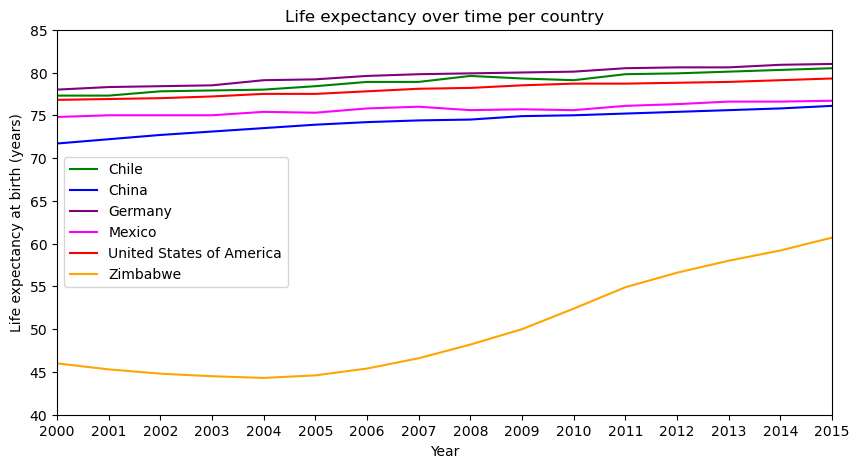

<Figure size 640x480 with 0 Axes>

In [9]:
# lineplot for all data
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('Life expectancy over time per country')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


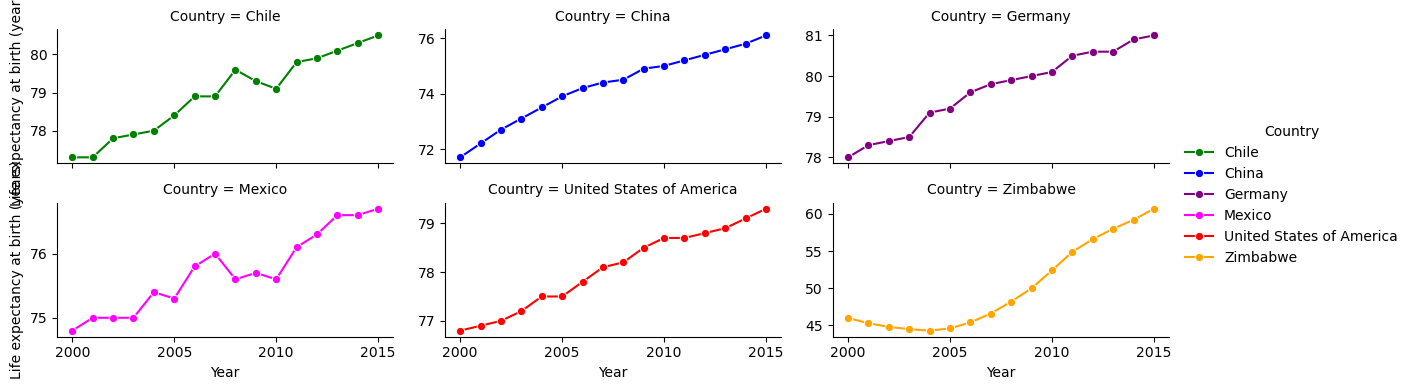

<Figure size 640x480 with 0 Axes>

In [61]:
# Displaying all charts individually so that  y-axis scale is optimum for each country
# Initialize a grid of plots with an Axes for each walk
grid_life = sns.FacetGrid(df, col="Country", hue="Country", palette=['green','blue','purple','magenta','red','orange'], col_wrap=3, height=2, aspect=2, sharey=False)
grid_life = (grid_life.map(sns.lineplot,"Year","Life expectancy at birth (years)",marker="o").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))
# Adjust the tick positions and labels
years2 = [2000, 2005, 2010, 2015]
grid_life.set(xticks=years2)
# Display the plot
plt.show()
# Clear the figure
plt.clf()

Intercept   -320.097206
Year           0.197971
dtype: float64
Pearson R results:  PearsonRResult(statistic=0.4069868848480841, pvalue=0.00017934386467328484)


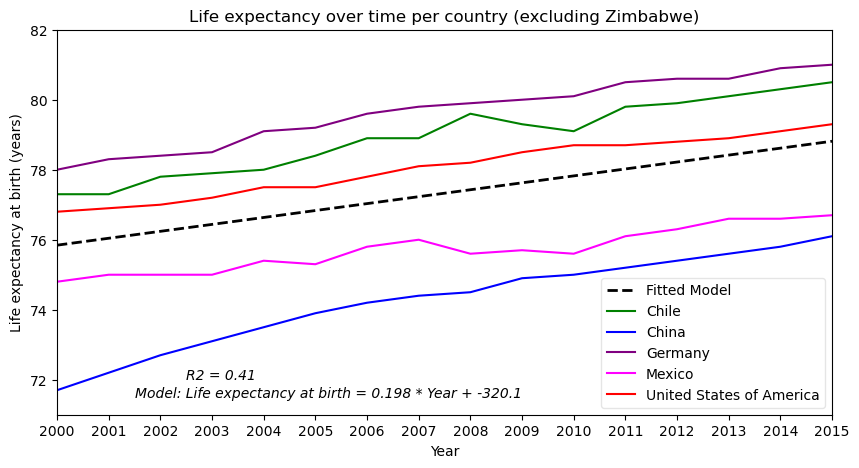

<Figure size 640x480 with 0 Axes>

In [10]:
# Filter the data to exclude Zimbabwe
df_not_Zim = df[df['Country'] != 'Zimbabwe']

# # Copute standard error of klongevity per country
# df_not_Zim['life_err'] = df_not_Zim.groupby('Country')['Life expectancy at birth (years)'].transform(lambda x: sem(x) if len(x) > 1 else float('nan'))
# df_not_Zim['life_mean'] = df_not_Zim.groupby('Country')['Life expectancy at birth (years)'].transform(lambda x: np.mean(x) if len(x) > 1 else float('nan'))
# df_not_Zim['life_err_low'] = df_not_Zim['life_mean'] - df_not_Zim['life_err']
# df_not_Zim['life_err_high'] = df_not_Zim['life_mean'] + df_not_Zim['life_err']
# print(df_not_Zim.head(10))

# Regression to compute longevity rate
model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ Year', data=df_not_Zim)
results = model.fit()
print(results.params)

# Extract coefficients for the linear model equation
intercept = results.params['Intercept']
slope = results.params['Year']
LM_not_Zim = f'Model: Life expectancy at birth = {slope:.3f} * Year + {intercept:.1f}'

# Compute Pearson correlation coefficient
r = stats.pearsonr(df_not_Zim['Life expectancy at birth (years)'], df_not_Zim['Year'])
print("Pearson R results: ", r) # PearsonRResult(statistic=0.4069868848480841, pvalue=0.00017934386467328484)
R2 = 'R2 = 0.41'

# lineplot for high longevity countries
# Set figure size
plt.figure(figsize=(10, 5))

# Create a line plot using seaborn
sns.lineplot(data=df_not_Zim, x='Year', y='Life expectancy at birth (years)', hue='Country', palette=['green','blue','purple','magenta','red'])

# Adding the linear model
years = df_not_Zim['Year'].unique()
years.sort()
fitted_values = results.predict(pd.DataFrame({'Year': years}))
plt.plot(years, fitted_values, color='black', linestyle='dashed', linewidth=2, label='Fitted Line')

# # Adding the shaded error
# plt.fill_between(df_not_Zim['life_mean'], df_not_Zim['life_err_low'], df_not_Zim['life_err_high'], alpha=0.2, color='grey') #this is the shaded error
# plt.plot(df_not_Zim['life_mean'], df_not_Zim['life_err'], color='grey') #this is the line itself

# Get the current axis
ax = plt.gca()

# Set the axis limits
ax.set_xlim(2000, 2015)
ax.set_ylim(71, 82)

# Set the ticks and tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

# Set the title
plt.title('Life expectancy over time per country (excluding Zimbabwe)')

# Add the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Fitted Model'] + labels[:-1]  # Move 'Fitted Line' to the top
handles = [handles[-1]] + handles[:-1]
ax.legend(handles, labels, framealpha=0.5)

# Annotate the linear model equation
plt.text(2001.5, 71.5, LM_not_Zim, fontsize=10, color='black', fontstyle='oblique')
plt.text(2002.5, 72, R2, fontsize=10, color='black', fontstyle='oblique')

# Display the plot
plt.show()

# Clear the figure
plt.clf()

#### Data Interpretation
__All countries:__  
The 1st lineplot shows that most countries display similar life expectancy trends over the 2000-2015 time period, expect Zimbabwe.  
For Chile, China, Germany, Mexico and USA, the life expectancy shows a slight increase over time and ranges 72-81 years, which is a high longevity.  
Zimbawe features a much lower life expectancy averaging 45 years from 2000-2007 but with a steady increase later on. We could predict when Zimbabwe's longevity will catch up to other countries (see prediction below). 
  
__Chile, China, Germany, Mexico, USA:__  
The 2nd lineplot is excluding Zimbabwe, which is an outlier, thus better showing differences among countries featuring high longevity.  
Countries rank in increasing order of life expectancy: China < Mexico < USA < Chile < Germany  
This view confirms that longevity is gradually increasing over time in a linear manner.  
I computed the linear regression across all those countries, and the equation is: _Life expectancy at birth (years) = 0.197*Year - 320.1_  

### 3.2/ GDP per country over years

#### Data Analysis

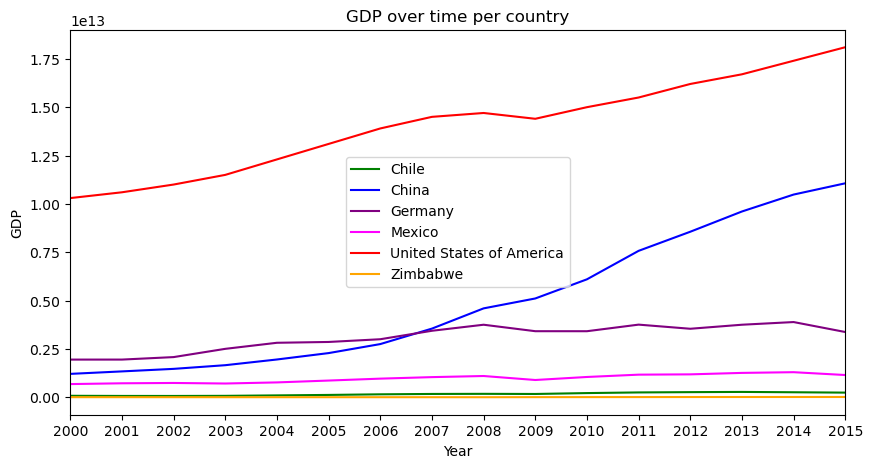

Country
Zimbabwe                    9.062580e+09
Chile                       1.697888e+11
Mexico                      9.766506e+11
Germany                     3.094776e+12
China                       4.957714e+12
United States of America    1.407500e+13
Name: GDP, dtype: float64


<Figure size 640x480 with 0 Axes>

In [13]:
# lineplot for all data 
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
#ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('GDP over time per country')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

# Average GDP per country
print(df.groupby('Country')['GDP'].mean().sort_values())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


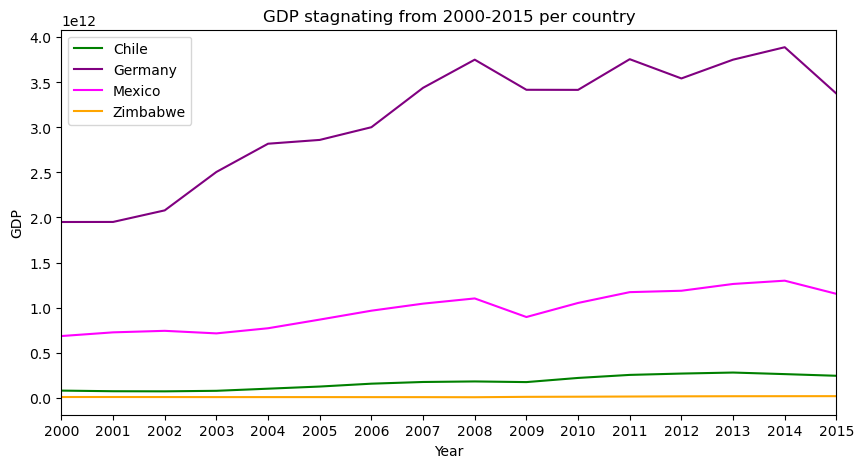

<Figure size 640x480 with 0 Axes>

In [14]:
# stagnant GDP countries only (Zimbabwe, Chile, Mexico, and Germany)
# Filter the data to exclude China and USA
df_GDP_flat = df[~df['Country'].isin(['China', 'United States of America'])]
print(df_GDP_flat.head())

# lineplot for flat GDP 
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df_GDP_flat, x='Year', y='GDP', hue='Country', palette=['green','purple','magenta','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
#ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('GDP stagnating from 2000-2015 per country')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


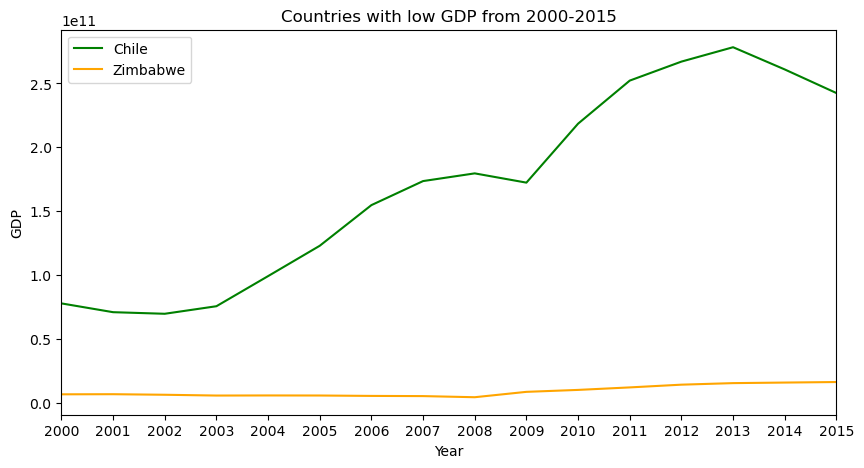

<Figure size 640x480 with 0 Axes>

In [15]:
# stagnant GDP countries only (Zimbabwe, Chile, Mexico, and Germany)
# Filter the data to exclude China and USA
df_GDP_low = df_GDP_flat[~df_GDP_flat['Country'].isin(['Germany', 'Mexico'])]
print(df_GDP_low.head())

# lineplot for flat GDP 
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df_GDP_low, x='Year', y='GDP', hue='Country', palette=['green','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
#ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('Countries with low GDP from 2000-2015')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

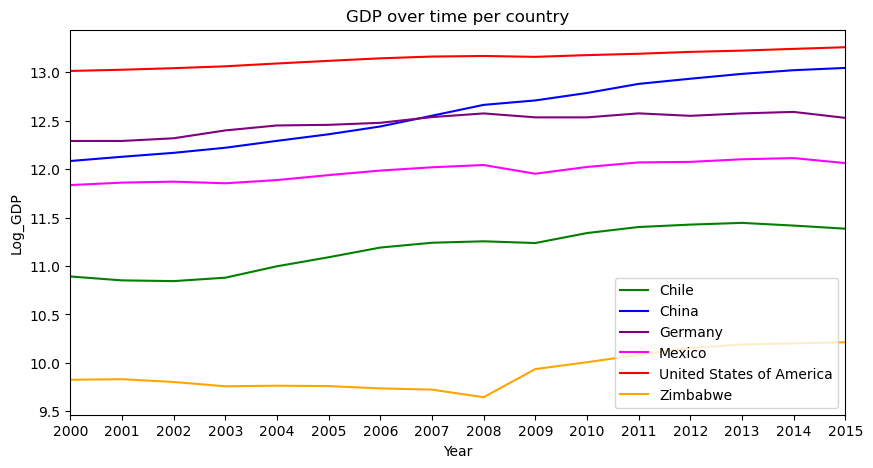

<Figure size 640x480 with 0 Axes>

In [16]:
# lineplot with all countries and GDP transformed to log10 values
# Convert GDP values to logarithmic scale
df['Log_GDP'] = np.log10(df['GDP'])
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df, x='Year', y='Log_GDP', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
#ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('GDP over time per country')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


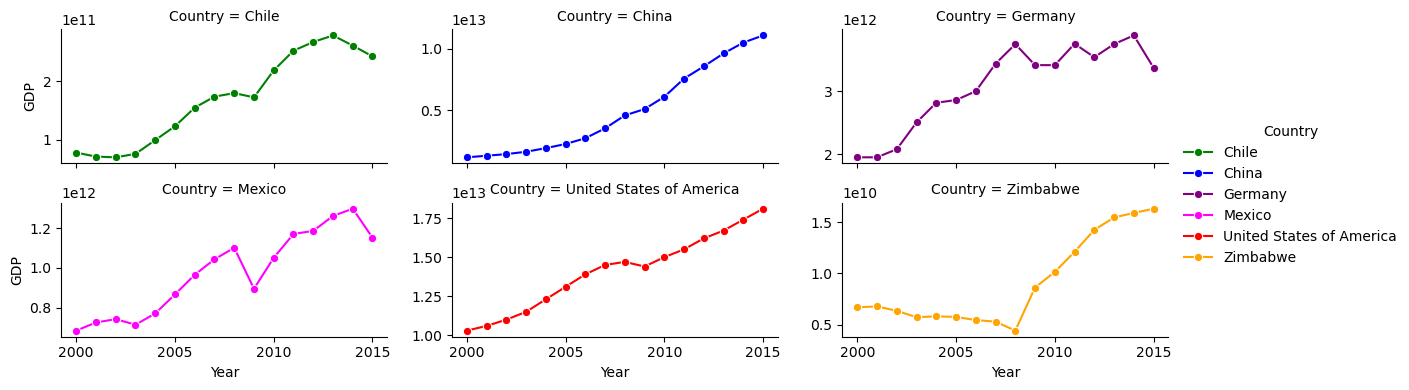

<Figure size 640x480 with 0 Axes>

In [17]:
# Displaying all charts individually so that  y-axis scale is optimum for each country
# Initialize a grid of plots with an Axes for each walk
grid_GDP = sns.FacetGrid(df, col="Country", hue="Country", palette=['green','blue','purple','magenta','red','orange'], col_wrap=3, height=2, aspect=2, sharey=False)
grid_GDP = (grid_GDP.map(sns.lineplot,"Year","GDP",marker="o").add_legend().set_axis_labels("Year","GDP"))
# Adjust the tick positions and labels
years2 = [2000, 2005, 2010, 2015]
grid_GDP.set(xticks=years2)
# Display the plot
plt.show()
# Clear the figure
plt.clf()

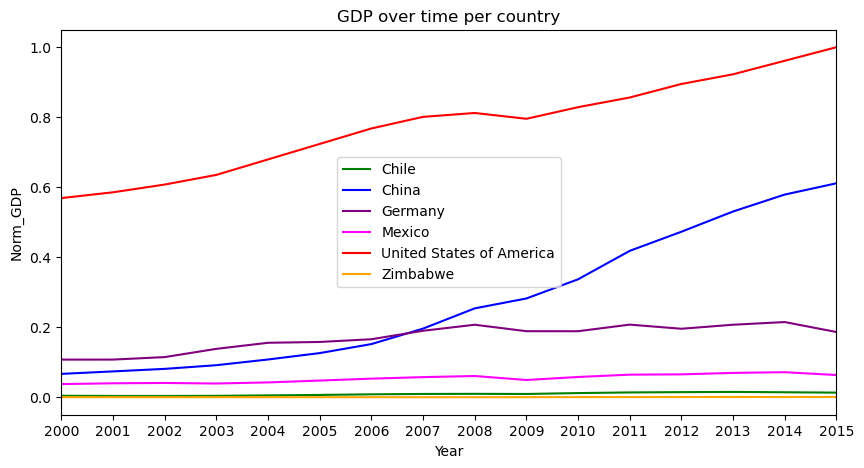

<Figure size 640x480 with 0 Axes>

In [18]:
# Data normalisation
# lineplot with all countries and GDP values normalised
# Normalise GDP values by dividing by max(GDP)
max_GDP = df.GDP.max()
#print(max_GDP)
df['Norm_GDP'] = df['GDP']/max_GDP
#print(df)
# Set figure size
plt.figure(figsize=(10, 5))
# Create a line plot using seaborn
sns.lineplot(data=df, x='Year', y='Norm_GDP', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax = plt.gca()
# Set the axis limits
ax.set_xlim(2000, 2015)
#ax.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
ax.set_xticks(years)
ax.set_xticklabels(years)
# Set the title
plt.title('GDP over time per country')
# Add the legend
ax.legend()
# Display the plot
plt.show()
# Clear the figure
plt.clf()

#### Data Interpretation
  
__All countries__:  
The 1st lineplot shows that the GDP varies from one conutry to the next.   
It stagnates for most countries (Zimbabwe, Chile, Mexico, and Germany), is steadily increasing for USA, and was mostly stable from 2000-2004 for China, but is since rapidly climbing.  
Looking at GPD averages, countries ranks in increasing order as follows: Zimbabwe (90B) < Chile (1700B) < Mexico (9800B) < Germany (30950B) < China (49600B) < USA (140750B)
Let's explore countries with a flat GDP further.

__Flat GDP countries (Mexico, Chile, Zimbabwe):__  
The 2nd lineplot shows that the GDP, whislt fluctuating from 2e12-4e12 is actually on the rise for Germany. 
Mexico's GDP exhibits a slow increase at around $1e11. 
GDP is very low for both Chile and Zimbabwe. Let's explore this further.

__Low GDP countries (Chile, Zimbabwe):__  
The 3rd lineplot shows that whilst low, Chile's GDP is generally on the rise with a slight recession in 2014-2015.  
Zimbabwe's GDP is very low.

__Log tranformation to better fit all data:__  
As the GDP varies by 1-4 order of magnitude, this variable lends itself to a log10 transformation (using np.log10() method).  
The 4th lineplot clearly separates all countries GDP over time in one plot. It's the best way to rank Countries based on GDP.
However, it doesn't show subtle trends.  

__All GDP plots in one figure:__  
The FacetGrid figures displays all individual countries with optimal scaling of the GDP, which clearly shows the upward trend for all countries (albeit at different scales).
This view is the only one that faithfully represent the GDP over time per country.

__Normalisation to compare GDP trend:__  
I was hoping that the normalisation of GDP would produce a chart that would place all countries on acomparable scale but that wasn't the case. The plot looks exactly like the top one. 

### 3.3/ Which variables are associated?

#### Data Analysis

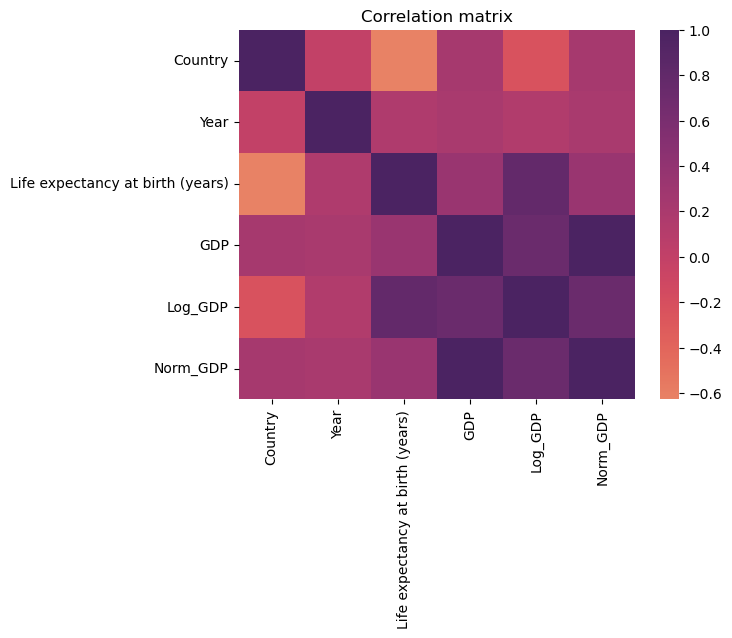

                                  Country  Year  \
Country                              1.00 -0.00   
Year                                -0.00  1.00   
Life expectancy at birth (years)    -0.63  0.16   
GDP                                  0.23  0.21   
Log_GDP                             -0.23  0.14   
Norm_GDP                             0.23  0.21   

                                  Life expectancy at birth (years)   GDP  \
Country                                                      -0.63  0.23   
Year                                                          0.16  0.21   
Life expectancy at birth (years)                              1.00  0.34   
GDP                                                           0.34  1.00   
Log_GDP                                                       0.79  0.73   
Norm_GDP                                                      0.34  1.00   

                                  Log_GDP  Norm_GDP  
Country                             -0.23      0.23  
Y

<Figure size 640x480 with 0 Axes>

In [21]:
# Correlation matrix
# Convert categorical variable country to 1-6 for correlation
df1 = df.copy()
df1.Country = df1.Country.replace({'Chile':1,'China':2,'Germany':3,'Mexico':4,'United States of America':5,'Zimbabwe':6}).astype(int)
#print(df1.head())

# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.color_palette("flare", as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(df1.corr(), center=0, cmap=colors, robust=True) # Passengers and hours are strongly positively correlated
plt.title('Correlation matrix')
plt.show()
plt.clf()
print(round(df1.corr(),2))

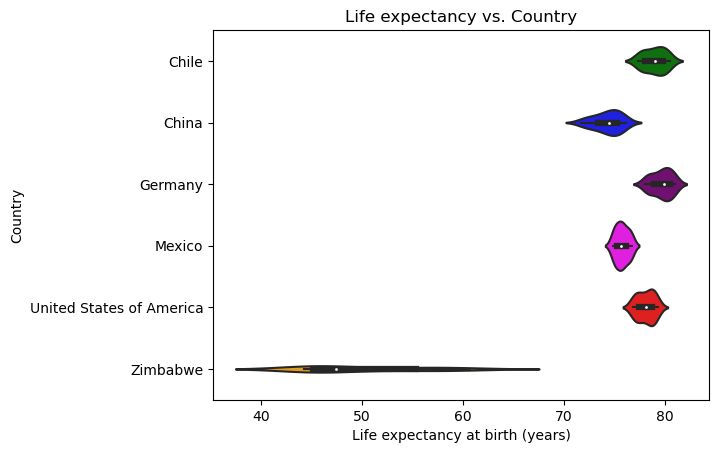

<Figure size 640x480 with 0 Axes>

In [22]:
# Violin plot of country vs. life expectancy
sns.violinplot(data=df, x='Life expectancy at birth (years)', y='Country', palette=['green','blue','purple','magenta','red','orange'])
plt.title('Life expectancy vs. Country')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Country')
plt.show()
plt.clf()

#### Data Interpretation  

__Correlation analysis:__  
The correlation matrix shows that GDP (and even more log_GDP) is strongly positively associated with longevity (R2 = 0.8).  
Life expectancy and country are negatively correlated (R2 = -0.6).

__Violinplot:__  
THis explains why longevity is negatively associated with country. Zimbabwe skews the data and reveals that the dataset is biased (not enough data points across the whole longevity range).

### 3.4/ Relationship between life expectancy and GDP

#### Data Analysis

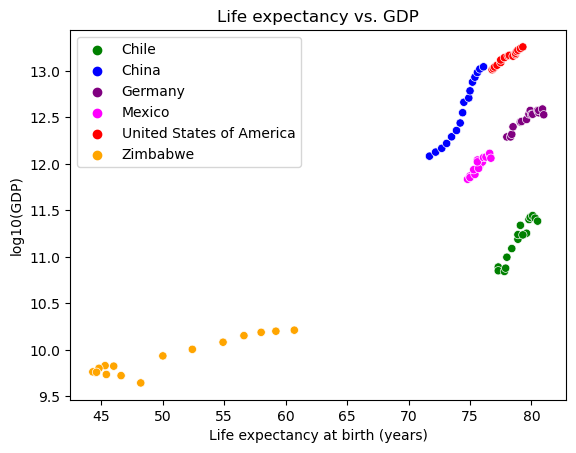

<Figure size 640x480 with 0 Axes>

In [25]:
# Both GDP and life expectancy variables are quantitative therefore a scatter plot can be used
sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='Log_GDP', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
plt.title('Life expectancy vs. GDP')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('log10(GDP)')
plt.legend()
plt.show()
plt.clf()

#### Data Interpretation  

__Scatterplot:__  
There is a clear positive linear relationship between longevity and GDP, but unique to each country.
Both variables are associated, meaning one determines the other.

### 3.5/ Drilling down on China  
From the chart above, we saw that if China's GDP continues its upward trend, it should intersect with USA's GDP in the near future.
Let's predict when that's going to happen using sklearn.linear_model package and LinearRegression function.

#### Data Analysis

United States of America: Slope = 471666666666.6667, Intercept = -932688333333333.4
China: Slope = 985952000000.0002, Intercept = -1975344096444445.0
The GDP lines intersect in the year: 2027.3877078180553


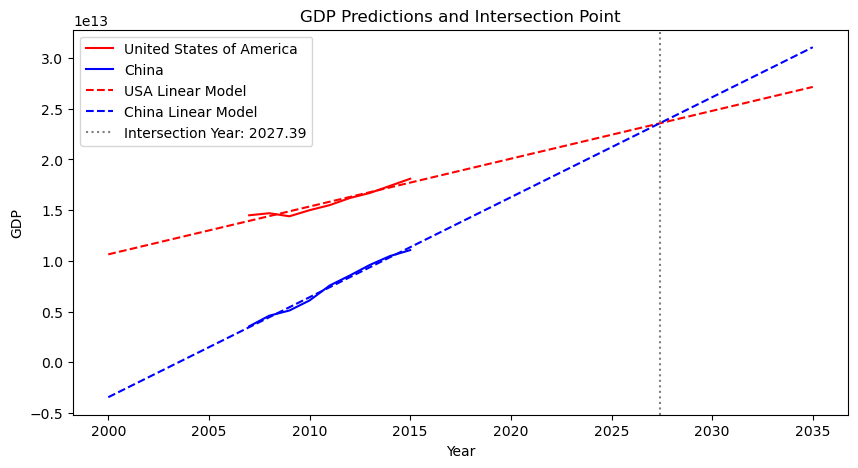

In [28]:
# Fit linear regression models
# Filter the data for each country
df_usa = df[(df['Country'] == 'United States of America') & (df['Year'] > 2006)]
df_china = df[(df['Country'] == 'China') & (df['Year'] > 2006)]

# Fit linear regression models
X_usa = df_usa['Year'].values.reshape(-1, 1)
X_china = df_china['Year'].values.reshape(-1, 1)

model_country1 = LinearRegression().fit(X_usa, df_usa['GDP'])
model_country2 = LinearRegression().fit(X_china, df_china['GDP'])

# Coefficients
slope1, intercept1 = model_country1.coef_[0], model_country1.intercept_
slope2, intercept2 = model_country2.coef_[0], model_country2.intercept_

# Print the coefficients
print(f"United States of America: Slope = {slope1}, Intercept = {intercept1}")
print(f"China: Slope = {slope2}, Intercept = {intercept2}")

# Calculate the year of intersection
intersection_year = (intercept2 - intercept1) / (slope1 - slope2)

# Print the year of intersection
print(f"The GDP lines intersect in the year: {intersection_year}")

# Plot the data and the linear models
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_usa, x='Year', y='GDP', label='United States of America', color='red')
sns.lineplot(data=df_china, x='Year', y='GDP', label='China', color='blue')

# Plot the linear models
years = np.linspace(df['Year'].min(), df['Year'].max() + 20, 100).reshape(-1, 1)
gdp_country1_pred = model_country1.predict(years)
gdp_country2_pred = model_country2.predict(years)
plt.plot(years, gdp_country1_pred, linestyle='dashed', color='red', label='USA Linear Model')
plt.plot(years, gdp_country2_pred, linestyle='dashed', color='blue', label='China Linear Model')

# Highlight the intersection point
plt.axvline(x=intersection_year, color='grey', linestyle='dotted', label=f'Intersection Year: {intersection_year:.2f}') # 2027
plt.title('GDP Predictions and Intersection Point')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

#### Data Interpretation  

Computing the linear regression for both USA and China since 2007 predicts, that providing the progression rates remain unchanged, their GDPs will intersect in the year 2027.  


### 3.5/ Drilling down on Zimbabwe  
From the chart above, we saw that if Zimbabwe's longevity continues its upward trend, it should intersect with the other countries in the future.
Let's predict when that's going to happen using sklearn.linear_model package and LinearRegression function.

#### Data Analysis

Other countries: Slope = 0.17127272727272697, Intercept = -266.4054545454539
Zimbabwe: Slope = 1.7418181818181826, Intercept = -3448.6363636363653
The longevity lines intersect in the year: 2026.1947210002318


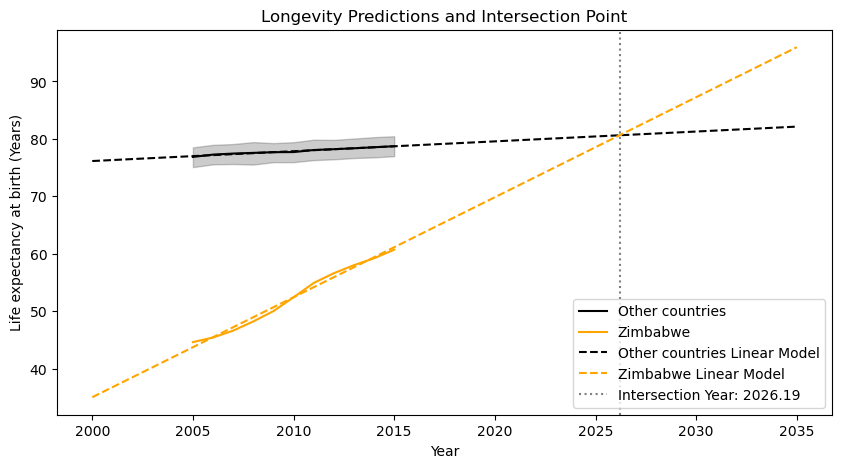

In [31]:
# Fit linear regression models
# Filter the data for each country
df_Zim = df[(df['Country'] == 'Zimbabwe') & (df['Year'] > 2004)]
df_not_Zim_2005 = df[(df['Country'] != 'Zimbabwe') & (df['Year'] > 2004)]
# print(df_Zim)
# print(df_not_Zim_2004)

# Fit linear regression models
X_not_Zim_2005 = df_not_Zim_2005['Year'].values.reshape(-1, 1)
X_Zim = df_Zim['Year'].values.reshape(-1, 1)

model_country3 = LinearRegression().fit(X_not_Zim_2005, df_not_Zim_2005['Life expectancy at birth (years)'])
model_country4 = LinearRegression().fit(X_Zim, df_Zim['Life expectancy at birth (years)'])

# Coefficients
slope3, intercept3 = model_country3.coef_[0], model_country3.intercept_
slope4, intercept4 = model_country4.coef_[0], model_country4.intercept_

# Print the coefficients
print(f"Other countries: Slope = {slope3}, Intercept = {intercept3}")
print(f"Zimbabwe: Slope = {slope4}, Intercept = {intercept4}")

# Calculate the year of intersection
intersection_year2 = (intercept3 - intercept4) / (slope4 - slope3)

# Print the year of intersection
print(f"The longevity lines intersect in the year: {intersection_year2}")

# Plot the data and the linear models
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_not_Zim_2005, x='Year', y='Life expectancy at birth (years)', label='Other countries', color='black')
sns.lineplot(data=df_Zim, x='Year', y='Life expectancy at birth (years)', label='Zimbabwe', color='orange')

# Plot the linear models
years = np.linspace(df['Year'].min(), df['Year'].max() + 20, 100).reshape(-1, 1)
life_country3_pred = model_country3.predict(years)
life_country4_pred = model_country4.predict(years)
plt.plot(years, life_country3_pred, linestyle='dashed', color='black', label='Other countries Linear Model')
plt.plot(years, life_country4_pred, linestyle='dashed', color='orange', label='Zimbabwe Linear Model')

# Highlight the intersection point
plt.axvline(x=intersection_year2, color='grey', linestyle='dotted', label=f'Intersection Year: {intersection_year2:.2f}') # 2026
plt.title('Longevity Predictions and Intersection Point')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (Years)')
plt.legend(loc='lower right')
plt.show()

#### Data Interpretation  

Computing the linear regression for Zimbabwe since 2005 predicts, that providing the progression rates remain unchanged, their life expectancy will intersect with that of high longevity  countries in the year 2026. 

### 3.7/ Drilling down on Chile  

Our data reveal that despite very low GDP, Chile features high life expectancy.   
Let's further explore this.

#### Data Analysis

Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64
Pearson R results:  PearsonRResult(statistic=0.9549840025397621, pvalue=8.91489059095361e-09)


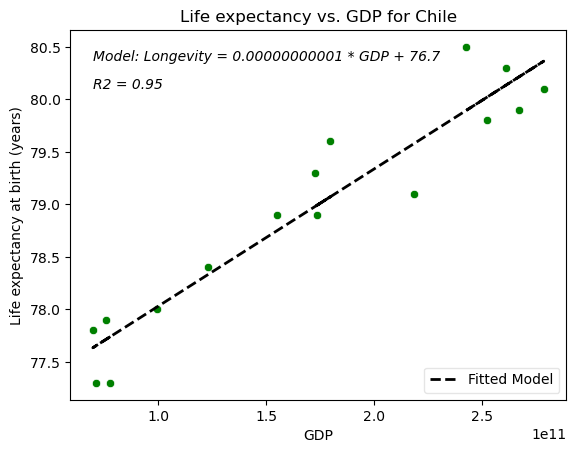

<Figure size 640x480 with 0 Axes>

In [34]:
# Filter data to keep Chile only
df_chile = df[df['Country'] == 'Chile']
#print(df_chile)

# Regression to compute longevity rate
model2 = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', data=df_chile)
results2 = model2.fit()
print(results2.params)

# Extract coefficients for the linear model equation
intercept2 = results2.params['Intercept']
slope2 = results2.params['GDP']
LM_Chile = f'Model: Longevity = {slope2:.11f} * GDP + {intercept2:.1f}'

# Compute Pearson correlation coefficient
r = stats.pearsonr(df_chile['Life expectancy at birth (years)'], df_chile['Log_GDP'])
print("Pearson R results: ", r) # PearsonRResult(statistic=0.9549840025397621, pvalue=8.91489059095361e-09)
R2 = 'R2 = 0.95'

# Both GDP and life expectancy variables are quantitative therefore a scatter plot can be used
sns.scatterplot(data=df_chile, x='GDP', y='Life expectancy at birth (years)', color='green')

# Adding the linear model
gdp_values = df_chile['GDP']
fitted_values2 = results2.predict(pd.DataFrame({'GDP': gdp_values}))
plt.plot(gdp_values, fitted_values2, color='black', linestyle='dashed', linewidth=2, label='Fitted Model')

# Get the current axis
ax = plt.gca()

# Set the title
plt.title('Life expectancy vs. GDP for Chile')

# Add the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Fitted Model'] + labels[:-1]  # Move 'Fitted Line' to the top
handles = [handles[-1]] + handles[:-1]
ax.legend(handles, labels, framealpha=0.5, loc='lower right')

# Annotate the linear model equation
plt.text(gdp_values.min(), fitted_values2.max(), LM_Chile, fontsize=10, color='black', fontstyle='oblique')
plt.text(gdp_values.min(), 80.1, R2, fontsize=10, color='black', fontstyle='oblique')

# Display the plot
plt.show()

# Clear the figure
plt.clf()

#### Data Interpretation  

The linear model, Pearon statistics, and scatterplot confirms that GDP and life expectancy are very strongly correlated (R2=0.95).

## 4/ Summary

__Visual summary:__  
In the cell below I combine all the previous charts into one figure with multiple subplot for consiciveness purpose.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


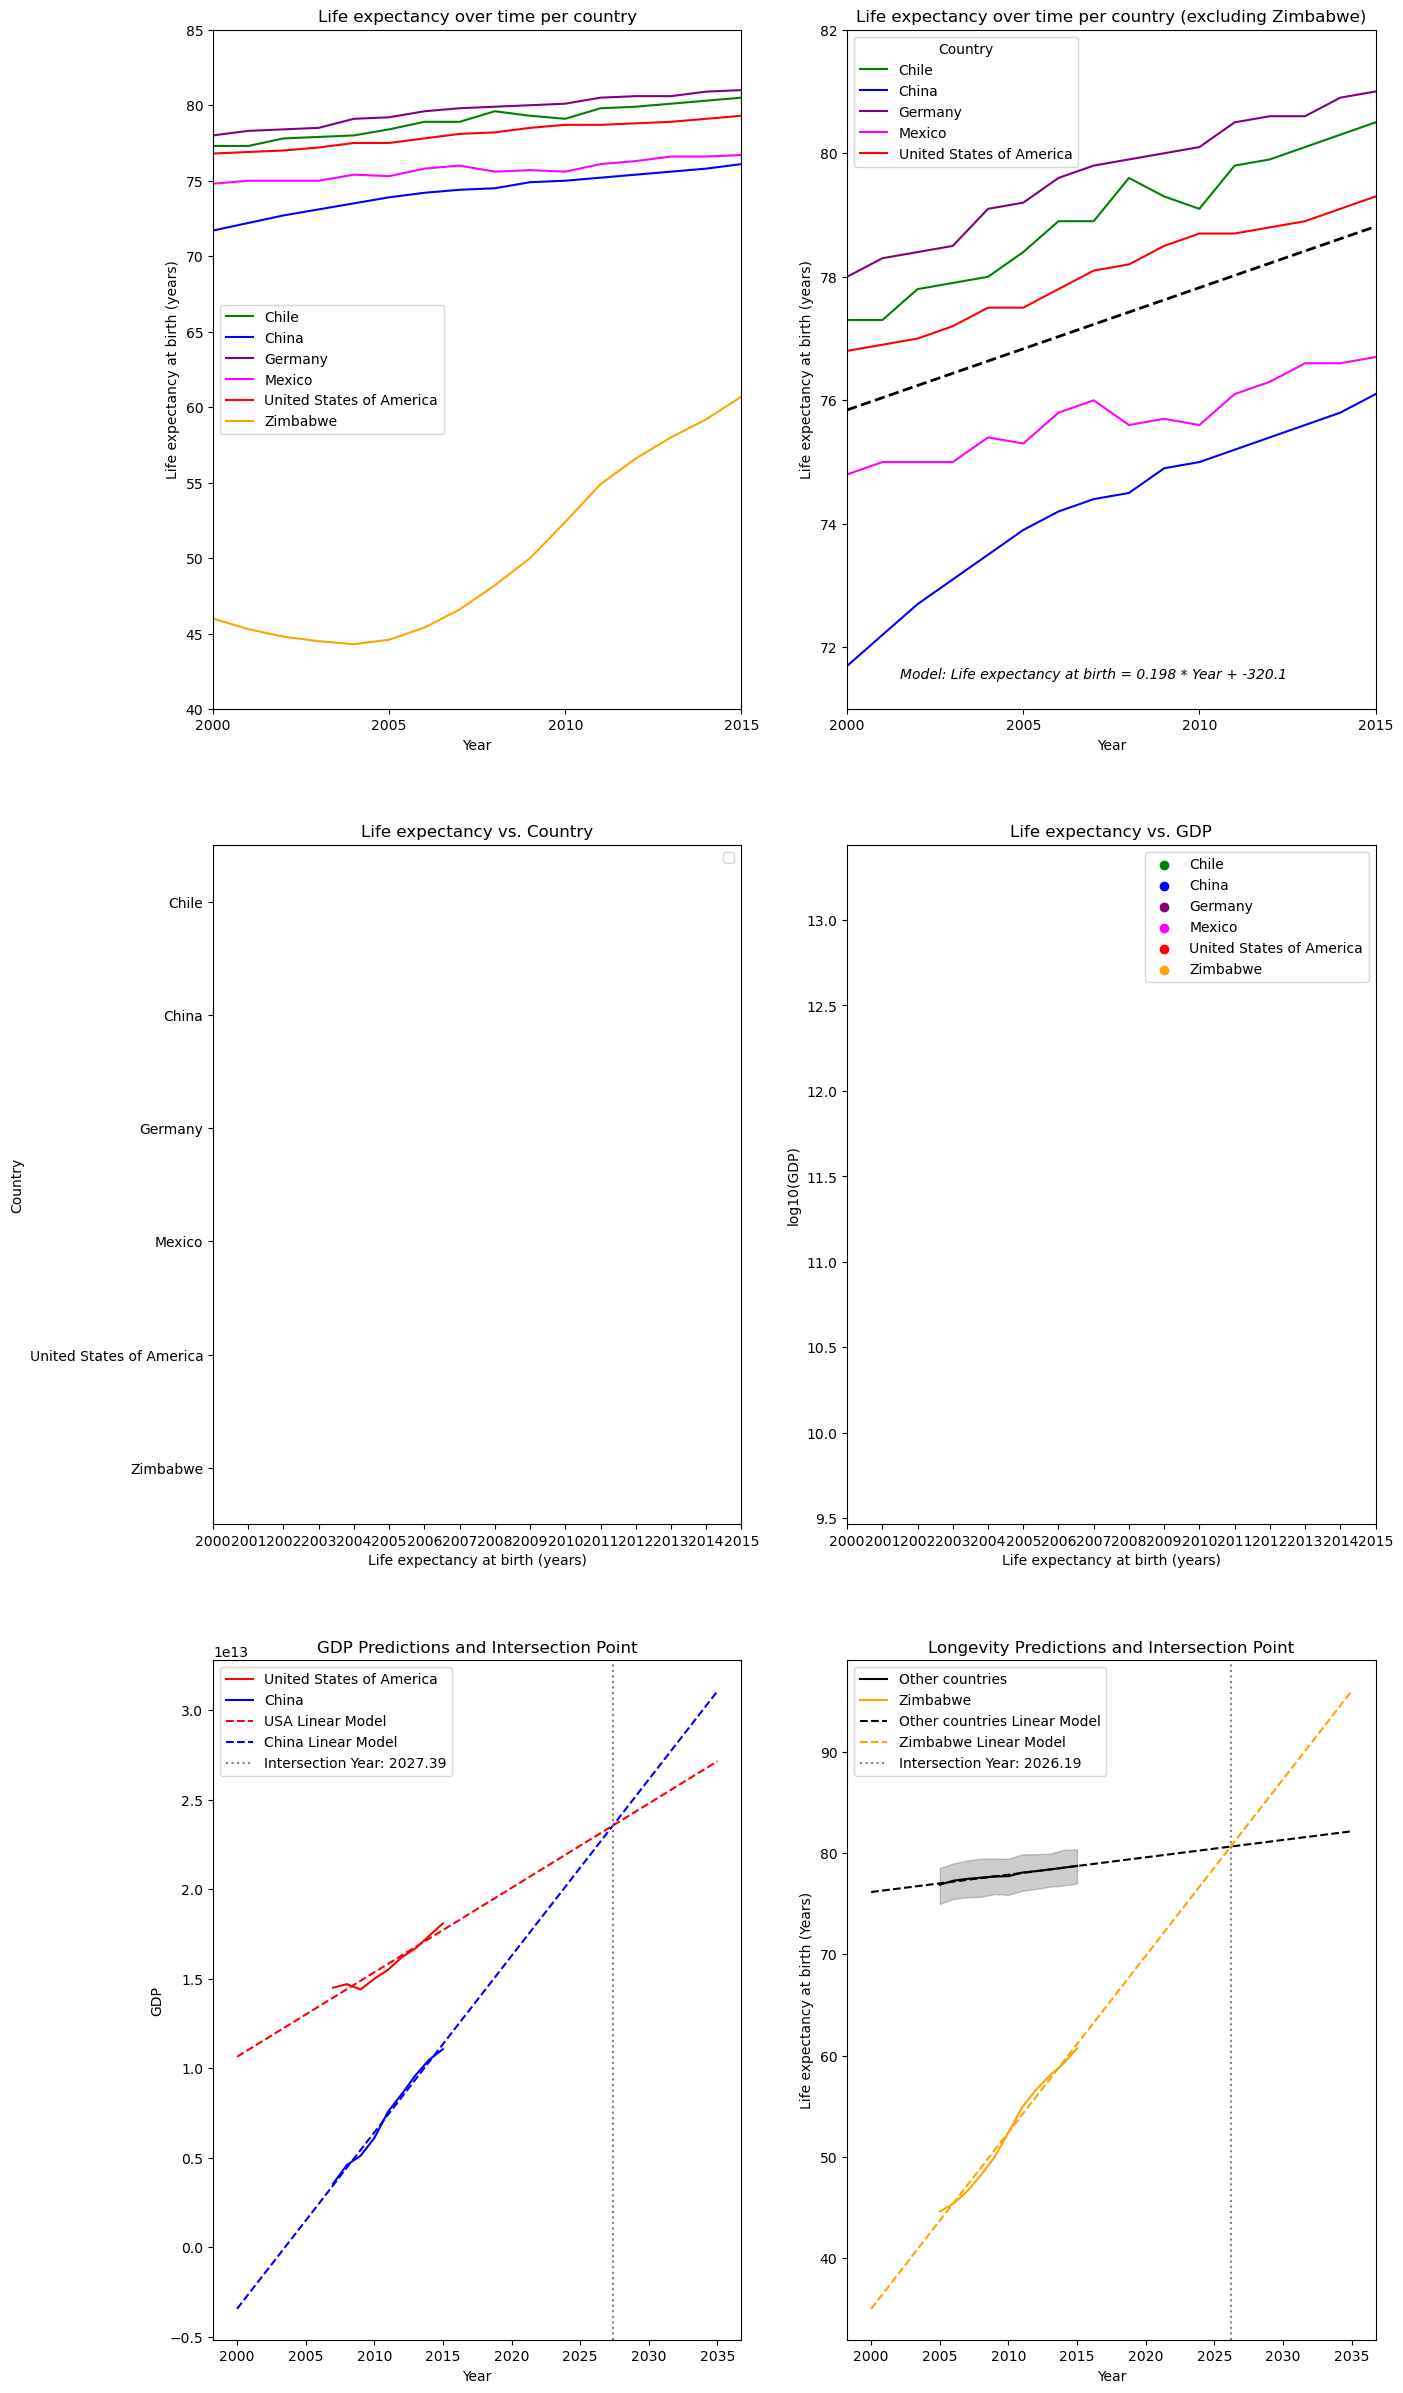

<Figure size 640x480 with 0 Axes>

In [37]:
# Fitting all the previous charts in a single figure with 6 (3*2)subplots
# set figure dimensions
plt.figure(figsize=(15,30))

# 1st subplot
plt.subplot(3,2,1)
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax1 = plt.gca()
# Set the axis limits
ax1.set_xlim(2000, 2015)
ax1.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
years2 = [2000, 2005,2010,2015]
ax1.set_xticks(years2)
ax1.set_xticklabels(years2)
# Set the title
plt.title('Life expectancy over time per country')
# Add the legend
ax1.legend()

# 2nd subplot
plt.subplot(3,2,2)
# Create a line plot using seaborn
sns.lineplot(data=df_not_Zim, x='Year', y='Life expectancy at birth (years)', hue='Country', palette=['green','blue','purple','magenta','red'])
# Adding the linear model
years = df_not_Zim['Year'].unique()
years.sort()
fitted_values = results.predict(pd.DataFrame({'Year': years}))
LM_not_Zim = f'Model: Life expectancy at birth = {slope:.3f} * Year + {intercept:.1f}'
plt.plot(years, fitted_values, color='black', linestyle='dashed', linewidth=2, label='Fitted Line')
# Get the current axis
ax2 = plt.gca()
# Set the axis limits
ax2.set_xlim(2000, 2015)
ax2.set_ylim(71, 82)
# Set the ticks and tick labels for the x-axis
ax2.set_xticks(years2)
ax2.set_xticklabels(years2)
# Set the title
plt.title('Life expectancy over time per country (excluding Zimbabwe)')
# Add the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Fitted Model'] + labels[:-1]  # Move 'Fitted Line' to the top
handles = [handles[-1]] + handles[:-1]
ax.legend(handles, labels, framealpha=0.5)
# Annotate the linear model equation
plt.text(2001.5, 71.5, LM_not_Zim, fontsize=10, color='black', fontstyle='oblique')

# 3rd subplot
plt.subplot(3,2,3)
sns.violinplot(data=df, x='Life expectancy at birth (years)', y='Country', palette=['green','blue','purple','magenta','red','orange'])
# Get the current axis
ax3 = plt.gca()
# Set the axis limits
ax3.set_xlim(2000, 2015)
#ax3.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
ax3.set_xticks(years)
ax3.set_xticklabels(years)
# Set the title and axis labels
plt.title('Life expectancy vs. Country')
# plt.xlabel('Life expectancy at birth (years)')
# plt.ylabel('Country')
# Add the legend
ax3.legend()


# 4th subplot
plt.subplot(3,2,4)
sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='Log_GDP', hue='Country', palette=['green','blue','purple','magenta','red','orange'])
plt.title('Life expectancy vs. GDP')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('log10(GDP)')
# Get the current axis
ax4 = plt.gca()
# Set the axis limits
ax4.set_xlim(2000, 2015)
#ax3.set_ylim(40, 85)
# Set the ticks and tick labels for the x-axis
ax4.set_xticks(years)
ax4.set_xticklabels(years)
plt.legend()

# 5th subplot
plt.subplot(3,2,5)
# Plot the data and the linear models
sns.lineplot(data=df_usa, x='Year', y='GDP', label='United States of America', color='red')
sns.lineplot(data=df_china, x='Year', y='GDP', label='China', color='blue')
# Plot the linear models
years = np.linspace(df['Year'].min(), df['Year'].max() + 20, 100).reshape(-1, 1)
gdp_country1_pred = model_country1.predict(years)
gdp_country2_pred = model_country2.predict(years)
plt.plot(years, gdp_country1_pred, linestyle='dashed', color='red', label='USA Linear Model')
plt.plot(years, gdp_country2_pred, linestyle='dashed', color='blue', label='China Linear Model')
# Highlight the intersection point
plt.axvline(x=intersection_year, color='grey', linestyle='dotted', label=f'Intersection Year: {intersection_year:.2f}') # 2026
plt.title('GDP Predictions and Intersection Point')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# 6th subplot
plt.subplot(3,2,6)
# Plot the data and the linear models
sns.lineplot(data=df_not_Zim_2005, x='Year', y='Life expectancy at birth (years)', label='Other countries', color='black')
sns.lineplot(data=df_Zim, x='Year', y='Life expectancy at birth (years)', label='Zimbabwe', color='orange')
# Plot the linear models
years = np.linspace(df['Year'].min(), df['Year'].max() + 20, 100).reshape(-1, 1)
life_country3_pred = model_country3.predict(years)
life_country4_pred = model_country4.predict(years)
plt.plot(years, life_country3_pred, linestyle='dashed', color='black', label='Other countries Linear Model')
plt.plot(years, life_country4_pred, linestyle='dashed', color='orange', label='Zimbabwe Linear Model')
# Highlight the intersection point
plt.axvline(x=intersection_year2, color='grey', linestyle='dotted', label=f'Intersection Year: {intersection_year2:.2f}') # 2026
plt.title('Longevity Predictions and Intersection Point')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (Years)')
plt.legend()

# Adjust margins
#plt.subplots_adjust(wspace=0.35, bottom=0.2)

# Show plots
plt.show()

# Clear the figure
plt.clf()

## 5/ General Conclusions  

__Life expectancy:__  
Most countries display similar life expectancy trends over the 2000-2015 time period, expect Zimbabwe.
Countries rank in increasing order of life expectancy: Zimbabwe < China < Mexico < USA < Chile < Germany
For Chile, China, Germany, Mexico and USA, the life expectancy ranges 72-81 years, which is a high longevity, and shows a slight increase over time.
Zimbawe features a much lower life expectancy averaging 45 years from 2000-2007 but with a steady increase later on. A linear model predicts that Zimbabwe's longevity will catch up to high longevity countries by 2026.

__GDP:__  
GDP varies from one country to the next by several orders of magnitude (billions to thousands of trillions).  
Countries' GDP ranks in increasing order as follows: Zimbabwe (90B) < Chile (1700B) < Mexico (9800B) < Germany (30950B) < China (49600B) < USA (140750B)
Overall the GDP in on the rise for all countries (albeit at different scales and rate).  
China's GDP was mostly stable from 2000-2004 for China, but is since rapidly climbing. A linear model predicts that China's GDP will catch up that of USA by 2027.

__Associated variables:__  
Life expectancy at birth and GDP are strongly positively correlated, meaning that one determines the other.
For instance, Zimbabwe which exhibits a short longevity also displays the smallest GDP.
Conversely, with the 3rd longest longevity, USA presents the largest GDP.
Germany presents the highest life expectancy but only the 3rd best GDP.
Probably we need to factor in population size to obtain a better predictor of GDP.
Chile is an interesting country with the 2nd lowest GDP but the 2nd highest longevity. Clearly other factors need to be considered and more data should be acquired.


## 6/ Follow up  
The dataset provide was very small (only 16 years covered, and 6 countries - roughly 1/continent).  
Some trends were drawn but a much larger dataset along a longer period of time and over many countries with a wide range of lfe expectancy/GDP would validate those trends.  
Other variables must be captured as well, such as population size, inflation, health status, peace status, etc...